In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("poster")

In [2]:
url = "https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv"

df= pd.read_csv(url, header=None,usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.head(3)

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36


In [3]:
df["Class label"].unique()

array([1, 2, 3], dtype=int64)

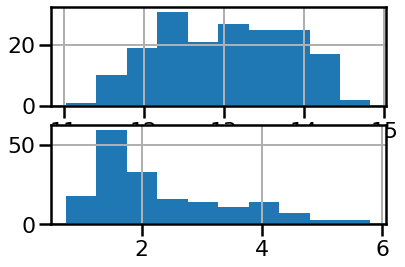

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,(ax1,ax2) = plt.subplots(2,1)
df["Alcohol"].hist(ax=ax1)
df["Malic acid"].hist(ax=ax2)

As we can see in the table above, the features Alcohol (percent/volumne) and Malic acid (g/l) are measured on different scales, so that Feature Scaling is necessary important prior to any comparison or combination of these data.

In [5]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [6]:
print ( f"Mean and standard deviation after standarization: \nMean= {round(df_std[:,0].mean(),2)}, Standar= {df_std[:,0].std()}")
print(f"\nMax value and min_value: \nMax= {df_minmax[:,0].max()}, Min={df_minmax[:,0].min()}")

Mean and standard deviation after standarization: 
Mean= -0.0, Standar= 1.0

Max value and min_value: 
Max= 1.0, Min=0.0


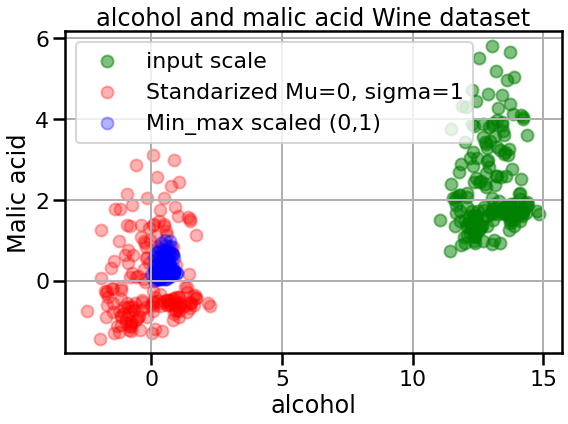

In [7]:
# plotting
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
                color="green", label="input scale", alpha=0.5)
    plt.scatter(df_std[:,0],df_std[:,1], color="red",
                label="Standarized Mu=0, sigma=1", alpha=0.3)
    plt.scatter(df_minmax[:,0], df_minmax[:,1], color="blue",
                label="Min_max scaled (0,1)", alpha=0.3)
    plt.title("alcohol and malic acid Wine dataset")
    plt.xlabel("alcohol")
    plt.ylabel("Malic acid")
    plt.legend(loc="upper left")
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

In [8]:
# aqui podemos realizar grafica con los diferentes claster (hacer tres scatter con clases vinos en diferentes colores)

In [9]:
#The effect of standardization on PCA in a pattern classification task
from sklearn.model_selection import train_test_split
X_wine = df.values[:,1:]
y_wine = df.values[:,0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_wine,y_wine, test_size=0.30, random_state=12345)

In [11]:
#linear regresion on a categorical variable using one hot encoder and dummy code
import pandas as pd
from sklearn import linear_model
# dataset rental prices in differentes citys

df = pd.DataFrame({
                'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC',
                'Seattle', 'Seattle', 'Seattle'],
                'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]
})

df.Rent.mean()

3333.3333333333335

In [12]:
# convert categorical variables to one hot encoding and fit a lineal model
one_hot_df = pd.get_dummies(df, prefix=["city"])
one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(one_hot_df[["city_NYC","city_SF","city_Seattle"]], one_hot_df["Rent"])
display (model.coef_ , model.intercept_)

array([ 166.66666667,  666.66666667, -833.33333333])

3333.3333333333335

In [14]:
# categorical data exercises
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\vgsales.csv"
vg_df = pd.read_csv(url, encoding="utf-8")
vg_df[["Name","Platform","Year","Genre","Publisher"]].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [15]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
print("Porcentaje de valores nulos en cada columna")
print("___________________________________________")
vg_df.isnull().sum() / len(vg_df)  * 100

Porcentaje de valores nulos en cada columna
___________________________________________


Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [17]:
# fillna Nan with "UNknow"
vg_df["Publisher"].fillna("Unknow", inplace=True)

In [18]:
vg_df["Year"].fillna(method="backfill", inplace=True)

In [19]:
vg_df["Year"] = vg_df["Year"].astype("int64")

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

vg_df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)

UsageError: Line magic function `%matplotlib.inline` not found.


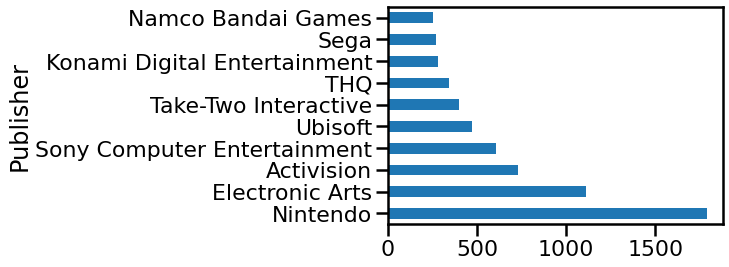

In [21]:
vg_df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10).plot.barh()
plt.show()


In [22]:
nintendo = vg_df[vg_df["Publisher"] == "Nintendo"]
electronic_art = vg_df[vg_df["Publisher"] == "Electronic Arts"]



In [23]:
nintendo_year =nintendo.sort_values(by="Year", ascending=True)

In [24]:
electronic_year = electronic_art.sort_values(by="Year", ascending=True)

No handles with labels found to put in legend.


<Figure size 576x648 with 0 Axes>

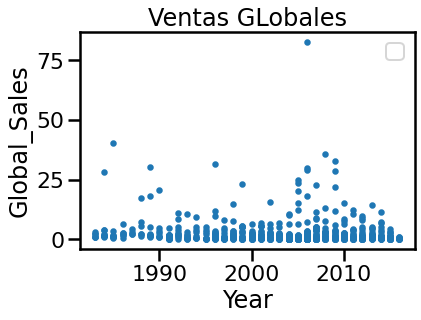

In [25]:
plt.figure(figsize=(8,9))
nintendo_year.plot(kind="scatter",x="Year", y="Global_Sales")
plt.title("Ventas GLobales")
plt.legend(loc='upper right')
plt.show()

In [26]:
#unique values for genre
genre = np.unique(vg_df["Genre"])
genre

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
#creating instance of labelencoder
labelencoder = LabelEncoder()
# assigning numerical values and storing in another column
vg_df["Genre_label"] = labelencoder.fit_transform(vg_df["Genre"])
vg_df.head(4)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_label
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,6
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10


In [28]:
# mapping genre and values
vg_df[["Genre_label","Genre"]].drop_duplicates("Genre").sort_values(by="Genre_label",ascending=True)

,Genre_label,Genre
16,0,Action
50,1,Adventure
39,2,Fighting
7,3,Misc
1,4,Platform
5,5,Puzzle
2,6,Racing
4,7,Role-Playing
9,8,Shooter
10,9,Simulation


In [29]:
pok = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Pokemon_clase.csv"
pok_df = pd.read_csv(pok, encoding="utf-8")
pok_df = pok_df.sample(random_state=1, frac=1).reset_index(drop=True)
pok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null object
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(4)
memory usage: 75.9+ KB


In [30]:
# unique values generation
np.unique(pok_df["Generation"]) 

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

In [31]:
from sklearn.preprocessing import OneHotEncoder

# transform and map pokemon generations with LabelEncoder
# transform and map pokemon legendary status with Label Encoder

# manualmente con map 
map = {"Gen 1":1,"Gen 2":2,"Gen 3":3,"Gen 4":4,"Gen 5":5,"Gen 6":6}
pok_df["Gen_map"] = pok_df["Generation"].map(map)

In [32]:
pok_df[['Name', 'Generation', 'Legendary',"Gen_map"]].iloc[4:10]

,Name,Generation,Legendary,Gen_map
4,Octillery,Gen 2,False,2
5,Helioptile,Gen 6,False,6
6,Dialga,Gen 4,True,4
7,DeoxysDefense Forme,Gen 3,True,3
8,Rapidash,Gen 1,False,1
9,Swanna,Gen 5,False,5


In [33]:
 gen_le = LabelEncoder()
 pok_df["Gen_label"] = gen_le.fit_transform(pok_df["Generation"])

 leg_le = LabelEncoder()
 pok_df["Lgnd_label"] = leg_le.fit_transform(pok_df["Legendary"])

 pok_df[['Name', 'Generation', 'Legendary',"Gen_map","Gen_label","Lgnd_label"]].iloc[4:10]

,Name,Generation,Legendary,Gen_map,Gen_label,Lgnd_label
4,Octillery,Gen 2,False,2,1,0
5,Helioptile,Gen 6,False,6,5,0
6,Dialga,Gen 4,True,4,3,1
7,DeoxysDefense Forme,Gen 3,True,3,2,1
8,Rapidash,Gen 1,False,1,0,0
9,Swanna,Gen 5,False,5,4,0


In [34]:
pok_df_sub = pok_df[['Name', 'Generation', 'Gen_label', 'Legendary', 'Lgnd_label']]

In [35]:
# encode generation label using one hot encoder
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(pok_df[["Gen_label"]]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr,columns=gen_feature_labels)


In [36]:
pok_df_ohe = pd.concat([pok_df_sub, gen_features], axis=1)
pok_df_ohe.iloc[4:10]

,Name,Generation,Gen_label,Legendary,Lgnd_label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,1,False,0,0.0,1.0,0.0,0.0,0.0,0.0
5,Helioptile,Gen 6,5,False,0,0.0,0.0,0.0,0.0,0.0,1.0
6,Dialga,Gen 4,3,True,1,0.0,0.0,0.0,1.0,0.0,0.0
7,DeoxysDefense Forme,Gen 3,2,True,1,0.0,0.0,1.0,0.0,0.0,0.0
8,Rapidash,Gen 1,0,False,0,1.0,0.0,0.0,0.0,0.0,0.0
9,Swanna,Gen 5,4,False,0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# get dummies
gen_onehot_features = pd.get_dummies(pok_df["Generation"])
pd.concat([pok_df[["Name","Generation"]],gen_onehot_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,0,1,0,0,0,0
5,Helioptile,Gen 6,0,0,0,0,0,1
6,Dialga,Gen 4,0,0,0,1,0,0
7,DeoxysDefense Forme,Gen 3,0,0,1,0,0,0
8,Rapidash,Gen 1,1,0,0,0,0,0
9,Swanna,Gen 5,0,0,0,0,1,0


### Data wrangling

In [38]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\telecom_churn.csv"
data1 = pd.read_csv(url)
data1.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [39]:
columns = data1.columns.values.tolist()

In [40]:
def choice_column(a):
    numero = np.random.choice(len(a), size=1)[0]
    return columns[numero]

In [41]:
choice_column(columns)

'Total intl charge'

### Text preprocessing

In [42]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
text = r"C:\Users\gonza\Downloads\bbc-text.csv"
text_df = pd.read_csv(text)
text_df.head(3)

FileNotFoundError: [Errno 2] File b'C:\\Users\\gonza\\Downloads\\bbc-text.csv' does not exist: b'C:\\Users\\gonza\\Downloads\\bbc-text.csv'

In [2]:
## create feature transformers for unigrams, bigrams, and trigrams
bow_converter = CountVectorizer()
bigram_converter = CountVectorizer(ngram_range=(2,2))
trigram_converter = CountVectorizer(ngram_range=(3,3))

In [3]:
## fit the transformer and look the vocabulary size
bow_converter.fit(text_df["text"])
words = bow_converter.get_feature_names()
bigram_converter.fit(text_df["text"])
bigrams = bigram_converter.get_feature_names()
trigram_converter.fit(text_df["text"])
trigrams = trigram_converter.get_feature_names()

print(len(words),len(bigrams),len(trigrams))

29421 330496 616317


In [4]:
## sneak a peek at the n-grams themselves
print(words[:10])

['00', '000', '0001', '000bn', '000m', '000s', '000th', '001', '001and', '001st']


In [5]:
print(bigrams[:10])

['00 59', '00 and', '00 for', '00 mark', '00 per', '00 qualifying', '000 000', '000 12', '000 130', '000 131']


In [6]:
print(trigrams[:10])

['00 59 000', '00 and an', '00 for work', '00 mark there', '00 per minute', '00 qualifying mark', '000 000 000', '000 000 bytes', '000 12 000', '000 12 700']


In [9]:
import nltk
stemmer = nltk.stem.porter.PorterStemmer()
m = stemmer.stem("flowers")
m

'flower'

In [11]:
import re
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gonza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'animals', 'weather', 'animals']
corpus = np.array(corpus)
corpus_df = pd.DataFrame({"Document":corpus,"Category":labels})
corpus_df = corpus_df[["Document","Category"]]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,The brown fox is quick and the blue dog is lazy!,animals
4,The sky is very blue and the sky is very beaut...,weather
5,The dog is lazy but the brown fox is quick!,animals


In [18]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words("english")

def normalize_document(doc):
    #lower case and remove especial charateres/whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    print(tokens)
    # filter stopwords out of the document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    print(filtered_tokens)
    doc = " ".join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)


In [16]:
corpus

array(['The sky is blue and beautiful.',
       'Love this blue and beautiful sky!',
       'The quick brown fox jumps over the lazy dog.',
       'The brown fox is quick and the blue dog is lazy!',
       'The sky is very blue and the sky is very beautiful today',
       'The dog is lazy but the brown fox is quick!'], dtype='<U56')

In [19]:
frase = 'The sky is blue and beautiful.'
normalize_document(frase)

['the', 'sky', 'is', 'blue', 'and', 'beautiful']
['sky', 'blue', 'beautiful']


'sky blue beautiful'

In [20]:
frase2 ="They indicate sentiment, which can be very valuable information to a data\
        scientist. So, ideally, we’d like a representation that highlights meaningful words"
normalize_document(frase2)

['they', 'indicate', 'sentiment', 'which', 'can', 'be', 'very', 'valuable', 'information', 'to', 'a', 'data', 'scientist', 'so', ',', 'ideally', ',', 'we', '’', 'd', 'like', 'a', 'representation', 'that', 'highlights', 'meaningful', 'words']
['indicate', 'sentiment', 'valuable', 'information', 'data', 'scientist', ',', 'ideally', ',', '’', 'like', 'representation', 'highlights', 'meaningful', 'words']


'indicate sentiment valuable information data scientist , ideally , ’ like representation highlights meaningful words'

In [21]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

['the', 'sky', 'is', 'blue', 'and', 'beautiful']
['sky', 'blue', 'beautiful']
['the', 'sky', 'is', 'blue', 'and', 'beautiful']
['sky', 'blue', 'beautiful']
['love', 'this', 'blue', 'and', 'beautiful', 'sky']
['love', 'blue', 'beautiful', 'sky']
['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
['the', 'brown', 'fox', 'is', 'quick', 'and', 'the', 'blue', 'dog', 'is', 'lazy']
['brown', 'fox', 'quick', 'blue', 'dog', 'lazy']
['the', 'sky', 'is', 'very', 'blue', 'and', 'the', 'sky', 'is', 'very', 'beautiful', 'today']
['sky', 'blue', 'sky', 'beautiful', 'today']
['the', 'dog', 'is', 'lazy', 'but', 'the', 'brown', 'fox', 'is', 'quick']
['dog', 'lazy', 'brown', 'fox', 'quick']


array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog', 'brown fox quick blue dog lazy',
       'sky blue sky beautiful today', 'dog lazy brown fox quick'],
      dtype='<U30')